<div align='center'><font size="6" color="#FC6306"> A beginner's guide to Feature Selection Methods </font></div>

## Feature Selecion Methods
In machine learning and statistics, feature selection, also known as variable selection, attribute selection or variable subset selection, is the process of selecting a subset of relevant features (variables, predictors) for use in model construction. Feature selection techniques are used for several reasons:
* simplification of models to make them easier to interpret by researchers/users,
* shorter training times,
* to avoid the curse of dimensionality,
* enhanced generalization by reducing overfitting (formally, reduction of variance)

Feature selection Methods can be divided into 3 main categories.
1. Filter Methods
2. Wrapper Methods
3. Embeded Methods

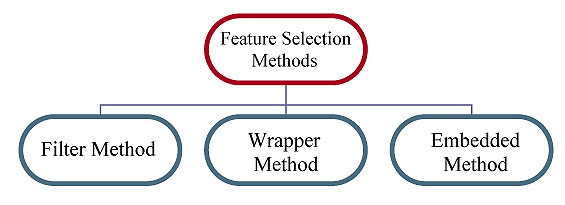

In addition to above techniques, there are few more techniques developed like **Hyrid Methods** and **Advanced Methods**. In this tutorial we will learn breifly about various techniques using all the different methods mentioned. In this tutorial, we have used various datasets from different kaggle competitions like - parbas data, house price data, santander data, titanic.

In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv
/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/titanic/train.csv
/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip
/kaggle/input/bnp-paribas-cardif-claims-management/test.csv.zip
/kaggle/input/bnp-paribas-cardif-claims-management/sample_submission.csv.zip


## A. Filter Methods - Basic Methods & Statistical Measures

**Filter Methods -** In this method we use different statistical measures to identify the correlation or predictive power of a single feature with output variable. The tests are done in a univariate manner i.e., in the absence of other features. So the filter methods does not consider the inter-dependency or interactions within the features. There several scoring methods we use for feature selection. Some of the methods are mentioned below. 

There are various procedures for feature selecton under Filter Methods. Below are some of the basic methods and statistical procedures to identify good predictive features. We will study each one of them one-by-one in this tutorial.

**Basic Methods**

1. Constant Features
2. Quasi-constant features
3. Duplicate features

**Statistical Methods**
1. Correlation
2. Mutual Information
3. Chi-Square | Fischer Square
4. Univariate feature selection
5. Univariate roc-auc | mse
       
There are several advantages of using filter methods for feature selection. Filter methods can be used as first hand tool to understand predictive power of features before going into Embeded / Hybrid / advanced tools. Mainly this is first step of feature selection pipeline.

Below are  different Filter methods based on the type of data available. We will discuss further some of the methods in this tutorial.

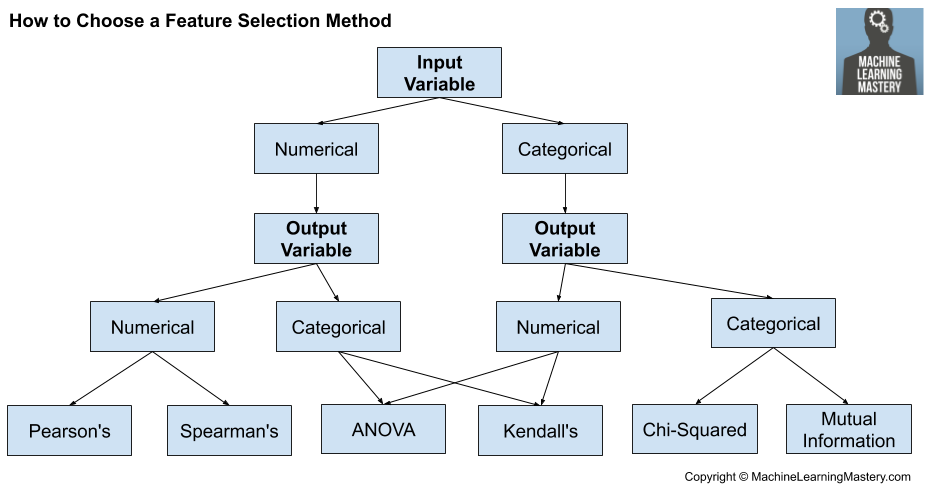

**Advantages**
* They rely on the characteristics of the data
* They do not use any machine Learning Algorithm
* Model agnostic - They do not depend on the machine learning model we use
* Tends to be less computationally expensive
* Lower performance compared to Wrapper Methods
* Relevant for quick screening and removal of irrelevant features

A typical algorithm consists of two steps.
1. Rank features according to the statistical method or criteria. Each feature is ranked independent of other features.
2. Select the highest ranking features.

## 1. Constant Features

In this method we remove the feature columns which have same value in all the data i.e., where variance is zero. Because the feature columns with zero variance in the data will have zero predictive power of output variable.

Below we will study how to identify the feature columns with same value in all the data. Once identified we remove those columns from the data as a preprocessing step before modelling.

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.feature_selection import VarianceThreshold


In [3]:
# Loading the data
df = pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv')
df.shape

(76020, 371)

In [4]:
# Check the presence of null data
[col for col in df.columns if df[col].isnull().sum() > 0] 

[]

In [5]:
# Split the data into train and test data
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['TARGET'], axis = 1),
    df['TARGET'],
    test_size = 0.3,
    random_state = 0
)

In [6]:
constant_features = [
    features for features in x_train.columns if x_train[features].std() == 0
]
len(constant_features)

38

So there are 38 constant feature columns with same value in all the data out of 370 columns. So in a single step we are able to identify 38 features with zero variance which does not provide any predictive information of output variable. So we can straight away delete these columns. In the below statement we delete all the 38 constant feature columns.  

In [7]:
x_train.drop(labels = constant_features, axis = 1, inplace=True)
x_test.drop(labels = constant_features, axis = 1, inplace = True)

## 2. Quasi - Constant Features

These are the feature columns where most of the data has the same value. So in this section we consider the threshold as 99% ie., a column is quasi-constant feature column if more than 99% of the data has same value. We exclude all the quasi constant features as part of the pre-processing step. This is an important step when we have data with thousands of features and in these cases there is a high chance of having lot of constant features and quasi-constant features. It is ideal to test and remove these as they will have almost zero predictability of output variabe (Y).

Below we will study how to identify the quasi-constant features and once identified delete those columns from original data. 

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    df.drop(labels = ['TARGET'], axis = 1),
    df['TARGET'],
    test_size = 0.3,
    random_state = 0
)

In [9]:
# Create a empty list
quasi_constant_feat = []

# Loop for searching all the columns in the data
for feature in x_train.columns:
    
    # find the predominant value
    predominant = (x_train[feature].value_counts() / np.float(
        len(x_train))).sort_values(ascending=False).values[0]
    
    # evaluate predominant feature
    if predominant > 0.999:
        quasi_constant_feat.append(feature)

len(quasi_constant_feat)

146

As we observe there are 141 features out of 370 total feature columns with more than 99.9% same value in all the data. So this simple test tells us that around 40% of the feature columns are not needed in building the machine learning model. So we can straight away delete all the 146 columns of data. So in the below code we straight away delete all these 146 columns from train and test data.

In [10]:
x_train.drop(labels = quasi_constant_feat, axis = 1, inplace=True)
x_test.drop(labels = quasi_constant_feat, axis = 1, inplace = True)
print(x_train.shape, x_test.shape)

(53214, 224) (22806, 224)


## 3. Duplicated Features

Sometimes there is a chance that duplicate features exist in the data. Usually this can happen when we are one-hot encoding the data. So it is always preferable to delete the duplicate features in the data. This may not happen always but it is ideal to test this and if any duplicate features exist then drop them. Below is the code to identify the deuplicate features. As we see below that there are duplicate features in the data.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['TARGET'], axis=1),
    df['TARGET'],
    test_size=0.3,
    random_state=0)
print(X_train.shape, X_test.shape)

(53214, 370) (22806, 370)


In [12]:
# Create a empty list for duplicated features
duplicated_feat = []
for i in range(0, len(X_train.columns)):

    col_1 = X_train.columns[i]

    for col_2 in X_train.columns[i + 1:]:

        # if the features are duplicated
        if X_train[col_1].equals(X_train[col_2]):

            # and then append the duplicated one to a list
            duplicated_feat.append(col_2)

In [13]:
duplicated_features = set(duplicated_feat)
print(len(duplicated_features))

65


We used **Set** statement here because a set will always contain the unique values. As we observe here there are 65 duplicate columns in the data. We can drop all these columns as our pre-processing step. Below is the code to drop all the duplicated columns contained in **duplicated_features**.

In [14]:
X_train.drop(labels = duplicated_features, axis = 1, inplace=True)
X_test.drop(labels = duplicated_features, axis = 1, inplace = True)
print(X_train.shape, X_test.shape)

(53214, 305) (22806, 305)


## 4. Correlation

Correlation is a statistical technique that can show whether and how strongly pairs of variables are **Linearly** related. There are several different correlation techniques. Some of the most important correlation is **Pearson Correlation**. **Pearson correlation** technique works best with **linear** relationships: as one variable gets larger, the other gets larger (or smaller) in direct proportion. It does not work well with curvilinear relationships (in which the relationship does not follow a straight line).

Correlation Coefficient value varies from -1 to +1, where:
1. 1 is a perfect positive correlation
2. 0 is no correlation
3. -1 is a perfect negative correlation

* Correlation is Positive when the values increase together
* Correlation is Negative when one value decreases as the other increases

Below is the example of various relationships between two variables. As we observe when two variables are perfectly linearly correlated then it's value is +1 or -1. Also we see below that correlation coefficent works only for Linear relationships. For non-linear relationships its value is 0. 

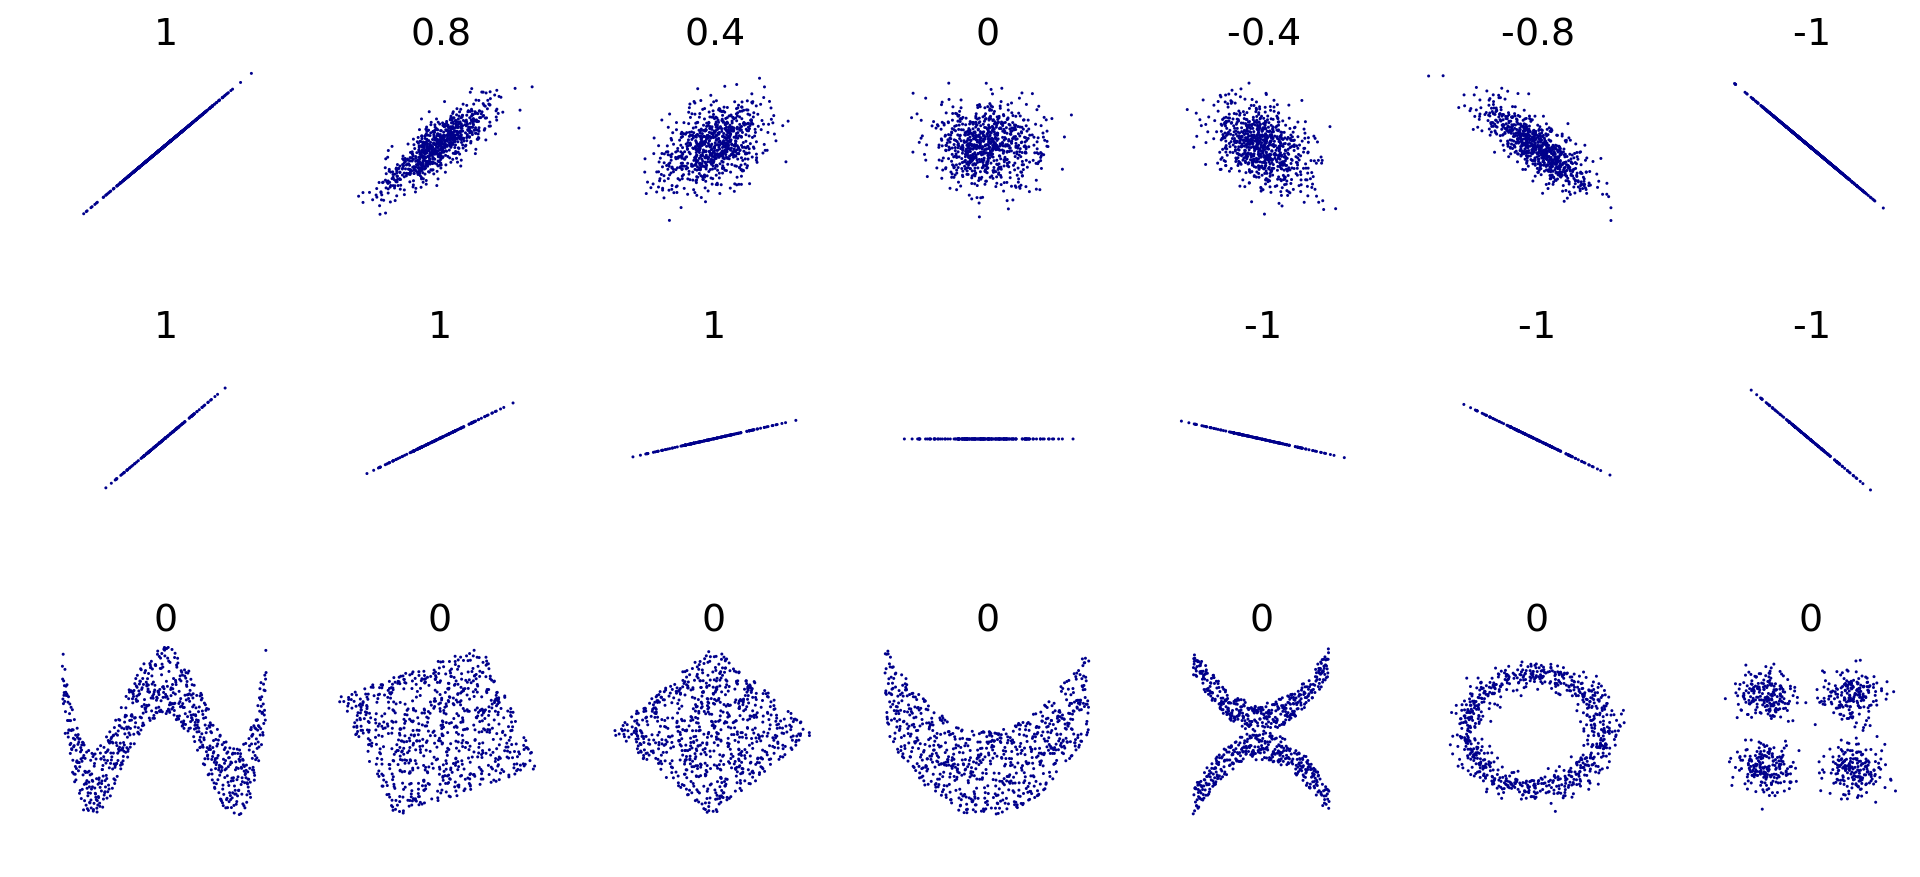

Correlation works for quantifiable data in which numbers are meaningful, usually quantities of some sort. It cannot be used for purely categorical data, such as gender, brands purchased, or favorite color.

So in this tutorial we will consider only the numerical features of data. Otherwise, this step has to be done post feature engineering once all the categorical features are encoded.

In [15]:
# load dataset
data = pd.read_csv('/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip')
data.shape

(114321, 133)

In [16]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(114321, 114)

In [18]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 112), (34297, 112))

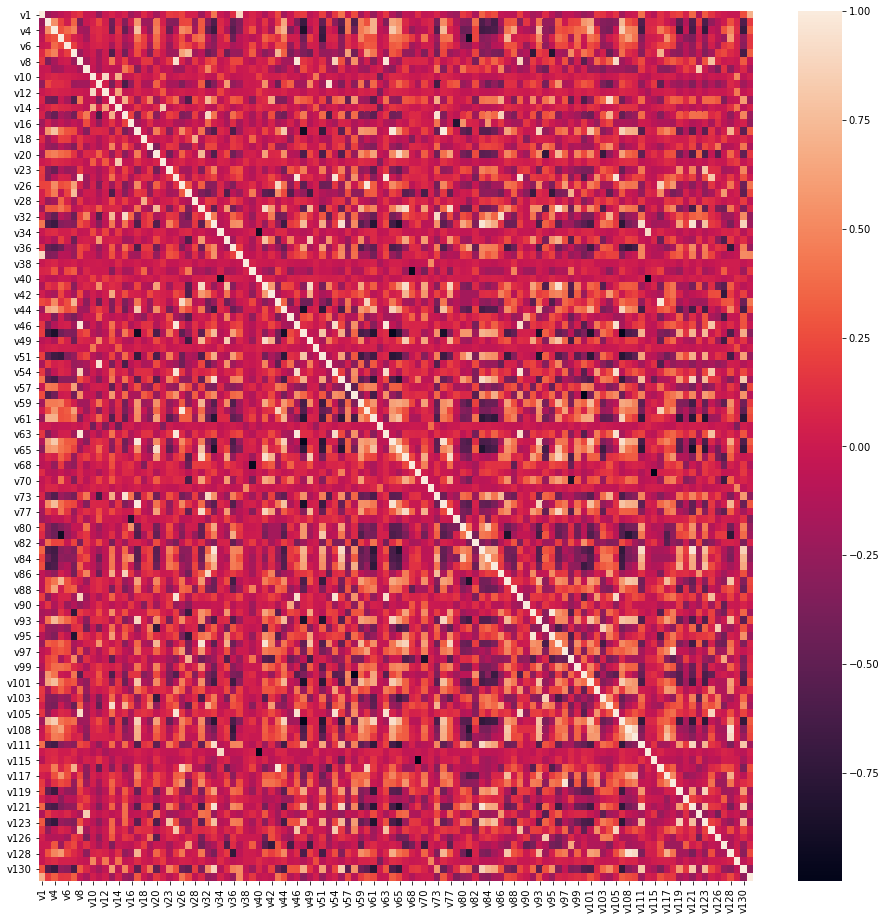

In [19]:
corrmat = X_train.corr()
fig, ax = plt.subplots()
fig.set_size_inches(16,16)
sns.heatmap(corrmat)

Above is the correlation heatmap of all the numerical featuers in the paribas dataset. Now out of this correlation map, let's identify the features with higher correlation and exclude those features. In the exercise we will set a threshold of 0.9 and exclude all the features with correlation more than 0.9. 

In [20]:
grouped_feature_ls = []
correlated_groups = []

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [21]:
corr_features = correlation(X_train, 0.9) # filter for all the features with correlation more than 0.9
correlated_features = set(corr_features) # Set statement is used to identify the unique feature in the list
print(len(correlated_features)) # length of set of correlated features

38


So here we identify 38 which are highly correlated with other variables (>0.9). So including these features will not add any additional information to the machine learning modelling. Ideally we should exclude all these features. The threshold can be changed from 0.9 to any number based on the business scenario. Below we will exclude all the correlated features. 

In [22]:
# Dropping all the correlated features from the data
X_train.drop(labels=correlated_features, axis=1, inplace=True)
X_test.drop(labels=correlated_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((80024, 74), (34297, 74))

## 5. Mutual Information(MI)

The mutual information of two random variables is a measure of the mutual dependence between the two variables. More specifically, it quantifies the "amount of information" obtained about one random variable through observing the other random variable. 

For example, if X and Y are independent, then knowing X does not give any information about Y and vice versa, so their mutual information is zero. At the other extreme, if X is a deterministic function of Y and Y is a deterministic function of X then all information conveyed by X is shared with Y: knowing X determines the value of Y and vice versa. So in summary - 
1. MI Measures the mutual depency of two variables
2. MI determines how similar the p(X,Y) is to product of p(X) and p(Y). Basically measures how dependent both the variables are.
3. If X and Y are independent, then MI is zero

Ideally feature selection is done post feature engineering once one-hot encoding of categorical variable is done. So for this purpose we include the numerical features of paribas dataset. In this tutorial we will study how to calculate the Mutual Information (MI) for both **[Classification](http://)** and **[Regression](http://)** problems.

In [23]:
from sklearn.feature_selection import mutual_info_classif, mutual_info_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [24]:
df = pd.read_csv('/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip')
df.shape

(114321, 133)

In [25]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(df.select_dtypes(include=numerics).columns)
df = df[numerical_vars]
df.shape

(114321, 114)

In [26]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df.drop(labels=['target', 'ID'], axis=1),
    df['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 112), (34297, 112))

### 5.1 MI for Classification

Below is code for identifying the mutual infromation for a classification problem between each feature and the output variable. 

In [27]:
mi = mutual_info_classif(X_train.fillna(0), y_train)
mi

array([0.00808257, 0.00828477, 0.01259031, 0.00297436, 0.00726915,
       0.00979509, 0.00234109, 0.00568146, 0.02485666, 0.00970963,
       0.01799426, 0.01184047, 0.0195438 , 0.0072533 , 0.00374907,
       0.00956724, 0.00225868, 0.00801849, 0.00733528, 0.01476422,
       0.00039298, 0.00734058, 0.01021685, 0.00863354, 0.00257293,
       0.0113463 , 0.00777578, 0.01086344, 0.00777609, 0.00789816,
       0.00323199, 0.00535879, 0.00326959, 0.00665813, 0.00720256,
       0.00839456, 0.00849096, 0.00812651, 0.01002277, 0.0065105 ,
       0.00407902, 0.00701702, 0.00947622, 0.04184577, 0.00766034,
       0.00763794, 0.00894816, 0.01126815, 0.00962292, 0.00575866,
       0.01002218, 0.00952144, 0.00848937, 0.02021426, 0.00625907,
       0.00998995, 0.01042579, 0.00930304, 0.00899881, 0.00356394,
       0.00740003, 0.01009949, 0.00815749, 0.01091399, 0.01052625,
       0.00339683, 0.00696161, 0.00334481, 0.00435903, 0.00725141,
       0.01023566, 0.00656146, 0.00876975, 0.00589116, 0.00962

In [28]:
# let's add the variable names and order the features
# according to the MI for clearer visualisation
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

v50     0.041846
v10     0.024857
v62     0.020214
v14     0.019544
v12     0.017994
          ...   
v28     0.002573
v8      0.002341
v18     0.002259
v102    0.001697
v23     0.000393
Length: 112, dtype: float64

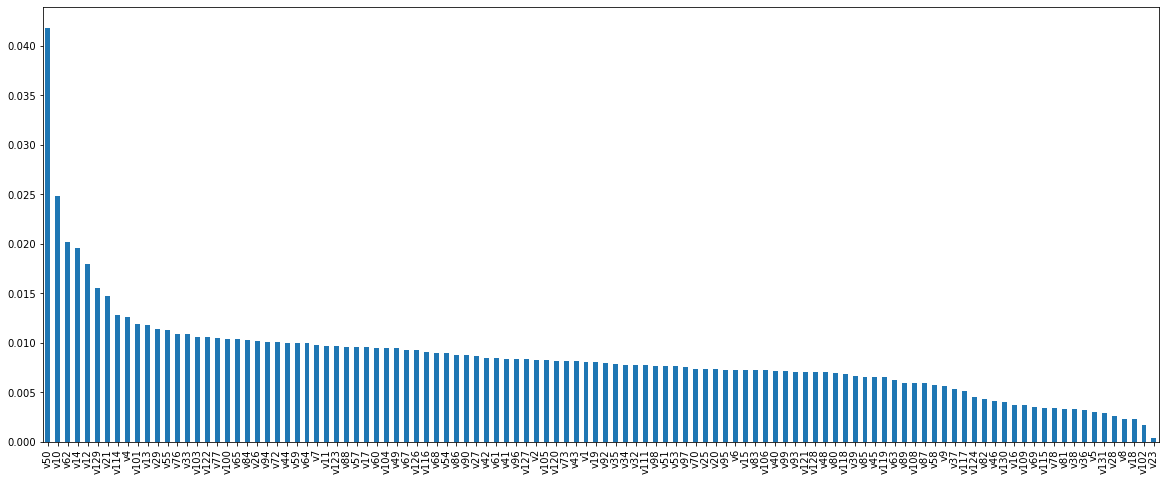

In [29]:
# and now let's plot the ordered MI values per feature
mi.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Compared to total number of features, we can see that there are very few features that contribute to most of the prediction of target. There are few features with almost zero mutual information (MI). So in general we select the top 10 or top 20 features from the above graph and build the model. For selecting the top 10 or top 20 we use **SelectKBest** method from sklearn.

In [30]:
# here I will select the top 10 features
# which are shown below
sel_ = SelectKBest(mutual_info_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v21', 'v44', 'v50', 'v62', 'v104', 'v114',
       'v129'],
      dtype='object')

### 5.2 MI for Regression

Below is code for identifying the mutual infromation for a regression problem between each feature and the output variable. For this purpose we used Housing pricing dataset. 

In [31]:
# load dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.shape

(1460, 81)

In [32]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [33]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [34]:
# determine the mutual information
mi = mutual_info_regression(X_train.fillna(0), y_train)
mi = pd.Series(mi)
mi.index = X_train.columns
mi.sort_values(ascending=False)

OverallQual      0.531593
GrLivArea        0.479250
TotalBsmtSF      0.386744
GarageCars       0.370000
GarageArea       0.368576
YearBuilt        0.345862
1stFlrSF         0.311782
GarageYrBlt      0.269417
MSSubClass       0.259088
FullBath         0.254935
YearRemodAdd     0.239133
2ndFlrSF         0.227786
LotFrontage      0.210894
Fireplaces       0.180996
TotRmsAbvGrd     0.180922
OpenPorchSF      0.175750
BsmtFinSF1       0.166702
LotArea          0.165943
BsmtUnfSF        0.109760
MasVnrArea       0.095829
OverallCond      0.095138
HalfBath         0.079772
WoodDeckSF       0.067027
BedroomAbvGr     0.050057
BsmtFullBath     0.029076
ScreenPorch      0.020874
KitchenAbvGr     0.010768
LowQualFinSF     0.007608
EnclosedPorch    0.006736
3SsnPorch        0.003942
MiscVal          0.003161
YrSold           0.003036
BsmtHalfBath     0.000000
BsmtFinSF2       0.000000
MoSold           0.000000
PoolArea         0.000000
Id               0.000000
dtype: float64

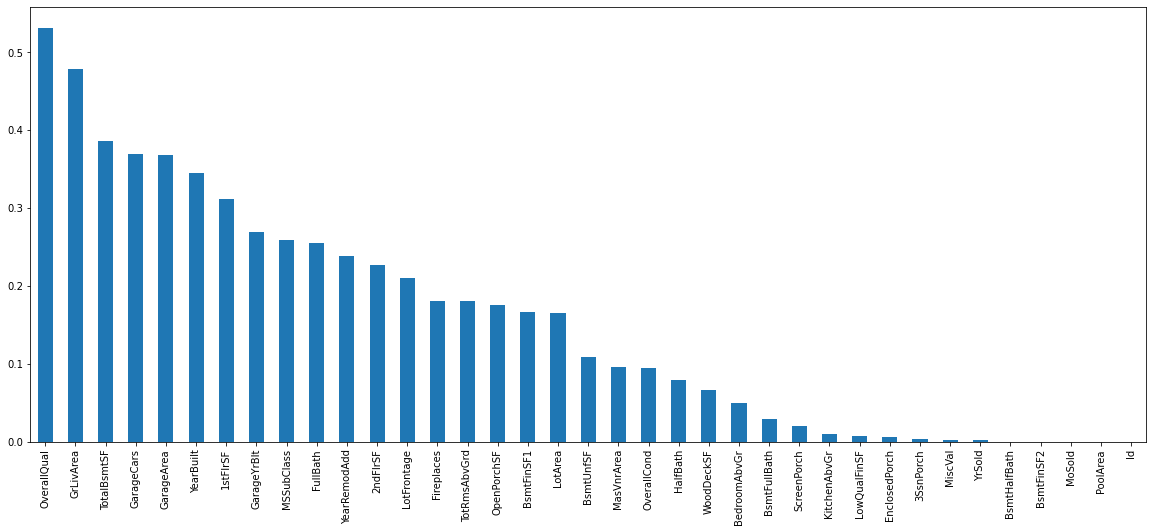

In [35]:
mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [36]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(mutual_info_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'TotalBsmtSF', 'GrLivArea', 'GarageCars'], dtype='object')

## 6. Fischer Score | chi square

It compares the observed distribution of the different classes of target Y among the different categories of the feature, against the expected distribution of the target classes, regardless of the feature categories. 

1. Measures the dependency of 2 variables
2. Suited for **Categorical Variables**
3. Target should be **binary**
4. Variable values should be non-negative, and typically boolean, frequencies or count
5. it compares the observed distribution class with the different labels against the expected one, would there be no labels 

In [37]:
from sklearn.feature_selection import chi2

In [38]:
# load dataset
data = pd.read_csv('/kaggle/input/titanic/train.csv')
data.shape

(891, 12)

In [39]:
# the categorical variables in the titanic are PClass, Sex and Embarked
# first I will encode the labels of the categories into numbers

# for Sex / Gender
data['Sex'] = np.where(data.Sex == 'male', 1, 0)

# for Embarked
ordinal_label = {k: i for i, k in enumerate(data['Embarked'].unique(), 0)}
data['Embarked'] = data['Embarked'].map(ordinal_label)

# PClass is already ordinal

In [40]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data[['Pclass', 'Sex', 'Embarked']],
    data['Survived'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((623, 3), (268, 3))

In [41]:
f_score = chi2(X_train.fillna(0), y_train)
f_score

(array([21.61080949, 63.55447864, 11.83961845]),
 array([3.33964360e-06, 1.55992554e-15, 5.79837058e-04]))

In [42]:
pvalues = pd.Series(f_score[1])
pvalues.index = X_train.columns
pvalues.sort_values(ascending = True)

Sex         1.559926e-15
Pclass      3.339644e-06
Embarked    5.798371e-04
dtype: float64

The smaller the p_value, the more significant the feature is to predict the target, in this case Survival in the titanic. Then, from the above data, Sex is the most important feature, then PClass then Embarked. 


## 7. Univariate Feature Selection

Univariate feature selection works by selecting the best features based on univariate statistical tests (**ANOVA**). The methods based on F-test estimate the degree of **linear dependency** between two random variables. They assume a **linear relationship** between the feature and the target. These methods also assume that the variables follow a **Gaussian distribution**.

Here we will assume that the features have linear relationship with target variable, and that they are normally distributed. But when or if you choose to implement these selection procedure for your features, you will have to check that this is the case, to make sure you are implementing the right method.

Ideally feature selection is done post feature engineering once one-hot encoding of categorical variable is done. So for this purpose we include the numerical features of paribas dataset. In this tutorial we will study how to calculate the Mutual Information (MI) for both **[Classification](http://)** and **[Regression](http://)** problems.

### 7.1 ANOVA for Classification

In [43]:
from sklearn.feature_selection import f_classif, f_regression
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [44]:
# load dataset
data = pd.read_csv('/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip')
data.shape

(114321, 133)

In [45]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [46]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(114321, 114)

In [47]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 112), (34297, 112))

In [48]:
univariate = f_classif(X_train.fillna(0), y_train)
univariate

(array([3.28943248e+01, 1.24509507e-01, 3.56791176e-04, 1.83925180e+01,
        7.70770317e+00, 8.51319945e+00, 2.58136886e+01, 3.66712075e+01,
        1.84987057e+03, 2.94115021e+01, 2.22103957e+02, 5.35072430e+01,
        1.40316020e+03, 6.71307533e+01, 2.99677161e+01, 4.72435469e+00,
        1.25309066e+01, 3.23780703e+01, 2.41975733e+01, 2.04523731e+02,
        6.97374959e+01, 1.86699385e+01, 5.43386252e+00, 7.79938651e+00,
        4.19582385e+01, 1.65746655e+01, 6.43577083e+01, 1.09781643e+02,
        7.17092018e+02, 2.82344426e+01, 7.75847300e+01, 5.74486104e+01,
        3.04247033e+02, 5.34881327e+00, 7.60912403e+01, 2.35795902e+01,
        3.05437914e+01, 6.83854785e+00, 5.16016558e+00, 5.18855982e+01,
        2.22602977e+01, 7.66466957e+01, 3.03384821e+01, 5.03565588e+03,
        1.09750749e+02, 2.99367125e+01, 1.22279689e+01, 1.14345375e+02,
        1.66146173e+01, 8.88998669e+01, 1.00008514e+01, 3.35814398e+00,
        9.82628852e+00, 7.15712510e+02, 2.34692647e+01, 1.744873

In [49]:
# let's add the variable names and order it for clearer visualisation
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

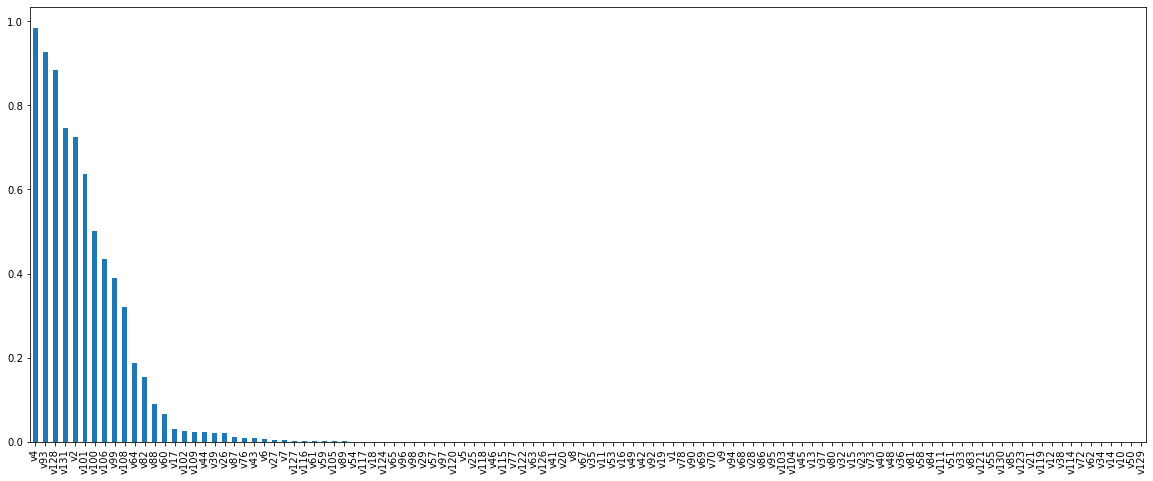

In [50]:
# and now let's plot the p values
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

Lower the p-value, the most predictive is the feature. There are a few features that do not seem to have predictive power according to this test, which are those on the left side of plot with pvalues above 0.05. These features with pvalue > 0.05 are indeed not important. However, the test assumes a **linear relationship**, so it might also be the case that the feature is related to the target but not in a non-linear manner.

So futher analysis is needed if we want to know the true nature of the relationship between feature and target.

We use **SelectKBest** method to get top 10 or top 20 features or top 10 percentile features from the data. 

In [51]:
# here I will select the top 10 features
sel_ = SelectKBest(f_classif, k=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['v10', 'v12', 'v14', 'v34', 'v38', 'v50', 'v62', 'v72', 'v114', 'v129'], dtype='object')

### 7.2 ANOVA for Regression

In [52]:
# load dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.shape

(1460, 81)

In [53]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [54]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [55]:
univariate = f_regression(X_train.fillna(0), y_train) # fill all null values with 0 for now
univariate = pd.Series(univariate[1])
univariate.index = X_train.columns
univariate.sort_values(ascending=False, inplace=True)

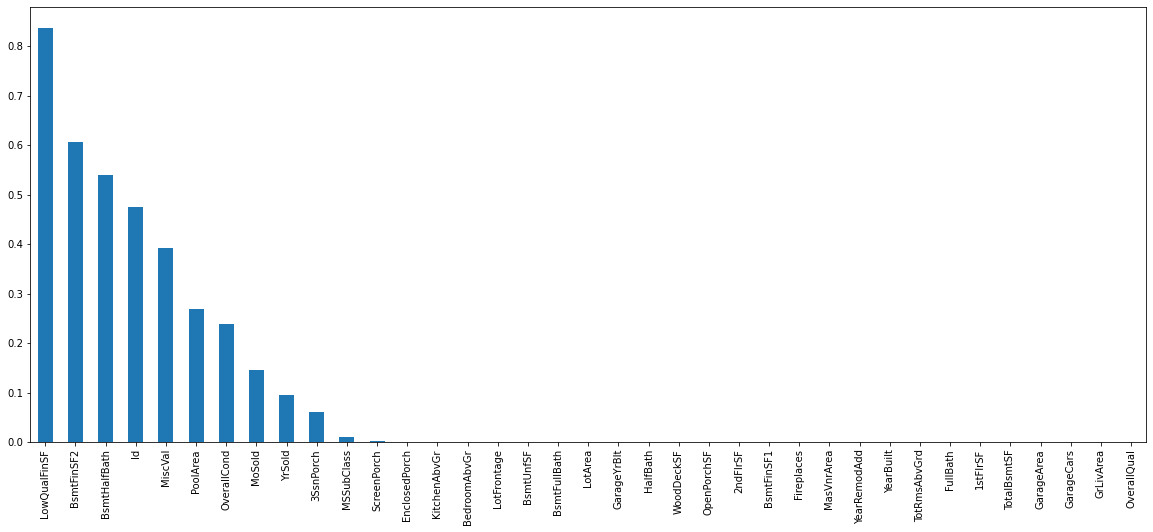

In [56]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20,8))

Here again, there seem to be a bunch of features towards the left with pvalues above 0.05, which are candidates to be removed, as this means that the features do not statistically significantly discriminate the target.

In [57]:
# here I will select the top 10 percentile
sel_ = SelectPercentile(f_regression, percentile=10).fit(X_train.fillna(0), y_train)
X_train.columns[sel_.get_support()]

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')

In [58]:
X_train = sel_.transform(X_train.fillna(0))
X_train.shape

(1022, 4)

We cannot use this method always as it takes Linear Assumption between feature and output variable. But we can use Log feature and test for the Linear relationship with output variable.

## 8. Univariate roc-auc or mse

This procedure works as follows:

- First, it builds one decision tree per feature, to predict the target
- Second, it makes predictions using the decision tree and the mentioned feature
- Third, it ranks the features according to the machine learning metric (roc-auc or mse)
- It selects the highest ranked features

**Note :** We can use other machine learning algorithms too other than decision tree in the above procedure.

In [59]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import roc_auc_score, mean_squared_error

In [60]:
# load dataset
data = pd.read_csv('/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip')
data.shape

(114321, 133)

In [61]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [62]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(114321, 114)

In [63]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 112), (34297, 112))

### 8.1 Univariate roc-auc for Classification

In [64]:
# build decision tree for each feature 
roc_values = []
for feature in X_train.columns:
    clf = DecisionTreeClassifier()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict_proba(X_test[feature].fillna(0).to_frame())
    roc_values.append(roc_auc_score(y_test, y_scored[:, 1]))

In [65]:
roc_values = pd.Series(roc_values)
roc_values.index = X_train.columns
roc_values.sort_values(ascending=False)

v50     0.630016
v10     0.627959
v129    0.575721
v14     0.575221
v62     0.571028
          ...   
v80     0.502298
v37     0.501346
v115    0.501261
v23     0.499950
v131    0.496980
Length: 112, dtype: float64

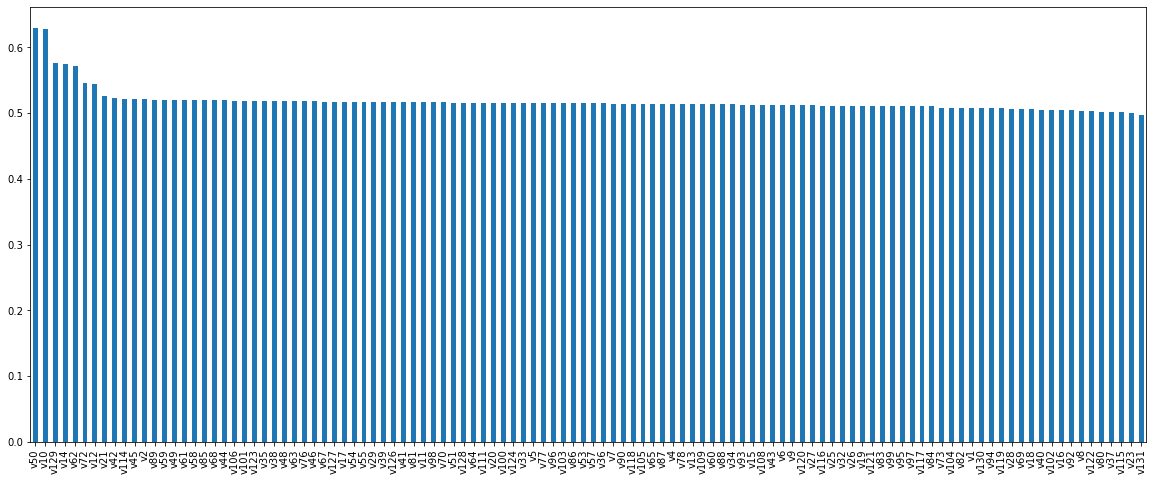

In [66]:
# and now let's plot
roc_values.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [67]:
# a roc auc value of 0.5 indicates random decision
# let's check how many features show a roc-auc value
# higher than random
len(roc_values[roc_values > 0.5])

110

110 of 114 features have predictive power higher than 0.5.  

### 8.2 Univariate roc-auc for Regression

In [68]:
# load dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.shape

(1460, 81)

In [69]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [70]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [71]:
# loop to build a tree, make predictions and get the mse
# for each feature of the train set
mse_values = []
for feature in X_train.columns:
    clf = DecisionTreeRegressor()
    clf.fit(X_train[feature].fillna(0).to_frame(), y_train)
    y_scored = clf.predict(X_test[feature].fillna(0).to_frame())
    mse_values.append(mean_squared_error(y_test, y_scored))

In [72]:
# let's add the variable names and order it for clearer visualisation
mse_values = pd.Series(mse_values)
mse_values.index = X_train.columns
mse_values.sort_values(ascending=False)

Id               1.326803e+10
BsmtUnfSF        1.011789e+10
LotArea          8.379937e+09
MasVnrArea       7.867109e+09
BsmtFinSF1       7.696158e+09
WoodDeckSF       7.271460e+09
3SsnPorch        6.948829e+09
OpenPorchSF      6.886315e+09
MoSold           6.875928e+09
YrSold           6.832078e+09
LotFrontage      6.827291e+09
PoolArea         6.816711e+09
BsmtFinSF2       6.806977e+09
BsmtHalfBath     6.798179e+09
EnclosedPorch    6.797342e+09
MiscVal          6.791047e+09
LowQualFinSF     6.764285e+09
ScreenPorch      6.707080e+09
KitchenAbvGr     6.665297e+09
BedroomAbvGr     6.642833e+09
1stFlrSF         6.496486e+09
BsmtFullBath     6.486271e+09
HalfBath         6.072529e+09
OverallCond      6.026309e+09
2ndFlrSF         5.816917e+09
TotalBsmtSF      5.669278e+09
Fireplaces       5.295673e+09
MSSubClass       5.258424e+09
GrLivArea        5.208607e+09
YearRemodAdd     5.138584e+09
TotRmsAbvGrd     5.076108e+09
GarageArea       4.960935e+09
YearBuilt        4.776575e+09
GarageYrBl

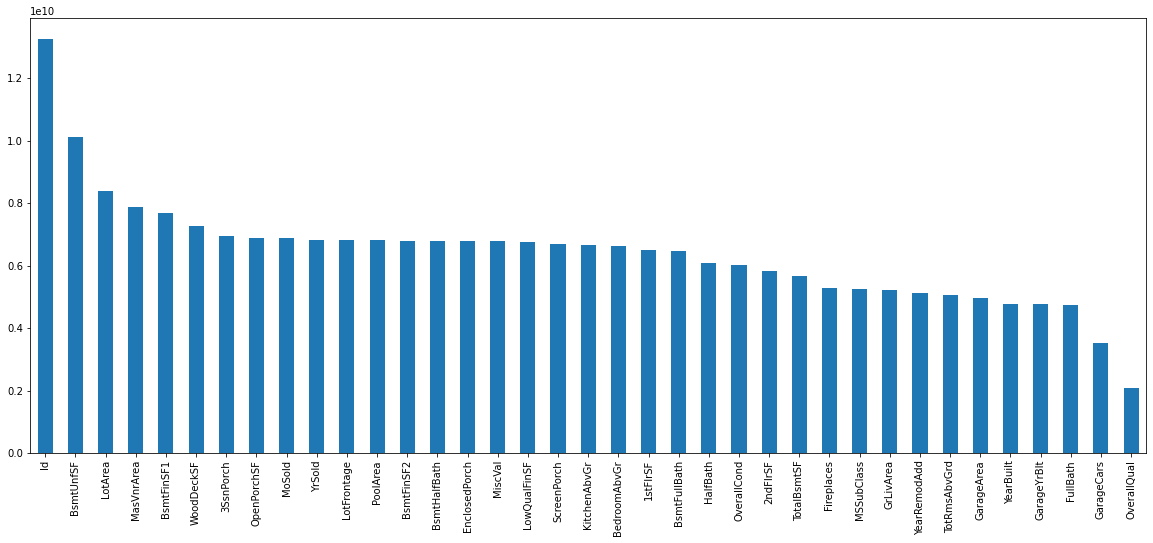

In [73]:
mse_values.sort_values(ascending=False).plot.bar(figsize=(20,8))

In Regression the smaller the mse, the better the model performance is. So in this case, we need to select from the right to the left.

## B. Wrapper Methods

There are different procedures to select features under Wrapper Methods. They are - 
1. Forward Selection - Add one feature at a time recursively
2. Backward Selection - Removes one feature at a time recursively
3. Exhaustive Search - searches across all possible feature combinations

**Procedure**
 
1. Search for the subset of features
2. Build the Machine Learning Model on the selected feature Subset
3. Evaluate Model Performance
4. Repeat

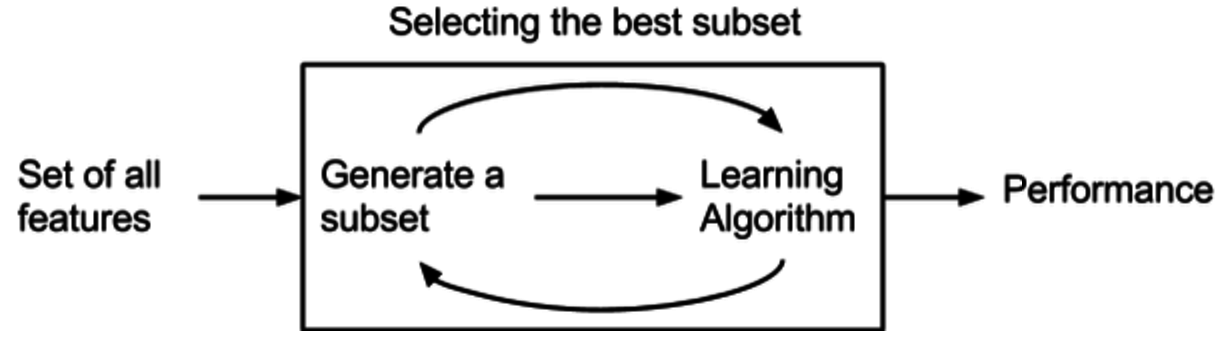

**Step Forward Feature Selection**

Forward selection, which involves starting with no variables in the model, testing the addition of each variable using a chosen model fit criterion, adding the variable (if any) whose inclusion gives the most statistically significant improvement of the fit, and repeating this process until none improves the model to a statistically significant extent.

**Step Backward Feature Selection**

Backward elimination, which involves starting with all candidate variables, testing the deletion of each variable using a chosen model fit criterion, deleting the variable (if any) whose loss gives the most statistically insignificant deterioration of the model fit, and repeating this process until no further variables can be deleted without a statistically insignificant loss of fit.

**Exhaustive Search**

This method searches across all possible feature combinations. Its aim is to find the best performing feature subset—we can say it’s a brute-force evaluation of feature subsets. It creates all the subsets of features from 1 to N, with N being the total number of features, and for each subset, it builds a machine learning algorithm and selects the subset with the best performance.The parameters that you can play with here are the 1 and N, which can be described as the minimum number of features and the maximum number of features. 

**Important :**
* The Optimal features depends on the Machine Learning Algorithm used
* They are able to detect the interactions between the variables
* Find the optimal feature subset for the desired classifier
* Very computationally expensive
* Usually provide the best performing feature subset for a given machine learning algorithm
* This selection procedure is called greedy, because it evaluates all possible feature combinations.
* In general this is a unfeasable solution because of its computational cost

There is a special package for python that implements this type of feature selection: mlxtend.

In the mlxtend implementation of the step forward feature selection, the stopping criteria is an arbitrarily set number of features. So the search will finish when we reach the desired number of selected features. 

As this is a exhaustive algorithm and computationally expensive, we will look into only forward feature selection procedure with maximum iterations of 5. Similar code can be applied to backward selection and exhaustive search.

## 9. Forward featrue selection 

In [74]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import roc_auc_score

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

### 9.1 Forward feature selection for Classification

In [75]:
# load dataset
data = pd.read_csv('/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip', nrows = 30000)
data.shape

(30000, 133)

In [76]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [77]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(30000, 114)

In [78]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((21000, 112), (9000, 112))

In [79]:
# find and remove correlated features
# in order to reduce the feature space a bit
# so that the algorithm takes shorter

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  55


In [80]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((21000, 57), (9000, 57))

In [81]:
sfs1 = SFS(RandomForestClassifier(n_jobs=4), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='roc_auc',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train.fillna(0)), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  57 out of  57 | elapsed:  3.0min finished

[2020-06-20 17:25:51] Features: 1/5 -- score: 0.6195414409641365[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  56 out of  56 | elapsed:  2.3min finished

[2020-06-20 17:28:10] Features: 2/5 -- score: 0.6578277413767376[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:  2.7min finished

[2020-06-20 17:30:54] Features: 3/5 -- score: 0.6843858493459217[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 

In [82]:
selected_feat= X_train.columns[list(sfs1.k_feature_idx_)]
selected_feat

Index(['v10', 'v23', 'v34', 'v38', 'v50'], dtype='object')

### 9.2 Forward feature selection for Regression

In [83]:
# load dataset
data = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
data.shape

(1460, 81)

In [84]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(1460, 38)

In [85]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((1022, 37), (438, 37))

In [86]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.8)
print('correlated features: ', len(set(corr_features)) )

correlated features:  3


In [87]:
# removed correlated  features
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)

X_train.shape, X_test.shape

((1022, 34), (438, 34))

In [88]:
X_train.fillna(0, inplace=True)

In [89]:
# step forward feature selection

from mlxtend.feature_selection import SequentialFeatureSelector as SFS

sfs1 = SFS(RandomForestRegressor(), 
           k_features=5, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   22.4s finished

[2020-06-20 17:38:11] Features: 1/5 -- score: 0.6677222067185814[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:   23.0s finished

[2020-06-20 17:38:34] Features: 2/5 -- score: 0.7230348159523557[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:   23.0s finished

[2020-06-20 17:38:57] Features: 3/5 -- score: 0.746113655080347[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 o

In [90]:
X_train.columns[list(sfs1.k_feature_idx_)]

Index(['OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath', 'GarageCars'], dtype='object')

## C. Embeded Methods

Embeded methods are all group of techniques which perform feature selection as part of the model construction process. The example of this approach is the **LASSO** method for constructing a linear model, which penalizes the regression coefficients with an L1 penalty, shrinking many of them to zero. Any features which have non-zero regression coefficients are 'selected' by the LASSO algorithm.

In this section  we will study below methods under embeded methods - 
1. Lasso Method
2. Tree Method

Similar approach can be applied many other machine learning algorithms to identify the best features in the dataset.

**Regularization Methods** -There are 3 types of Regularization methods . In this tutorial we will study **LASSO Method**
1. The L1 Regularization (also called as LASSO)
2. The L2 Regularization (also called as Ridge)
3. The L1/L2 Regularization (also called Elastic Net)

**Lasso Method -** is a method of adding penalty on the different parameters of the model to reduce the freedom of the model. Hence, the model is less likely to overfit to the noise of training data and will improve the generalization abilities of the model for linear models. Though originally defined for linear regression, lasso regularization is easily extended to a wide variety of statistical models including generalized linear models, generalized estimating equations, proportional hazards models, and M-estimators, in a straightforward fashion.

So we can fit Linear and Logistic regression with Lasso regularization, helps us to eliminate the features with coeffiecents zero.

## 10. Lasso Method

In [91]:
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectFromModel

In [92]:
# load dataset
data = pd.read_csv('/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip')
data.shape

(114321, 133)

In [93]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [94]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(114321, 114)

In [95]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((80024, 112), (34297, 112))

In [96]:
# linear models benefit from feature scaling

scaler = StandardScaler()
scaler.fit(X_train.fillna(0))

StandardScaler()

In [97]:
# l1 penalty is used for LASSO fitting
sel_ = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'))
sel_.fit(scaler.transform(X_train.fillna(0)), y_train)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'))

In [98]:
# this command let's me visualise those features that were kept
sel_.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True, False,  True,  True,  True,
       False,  True, False,  True,  True,  True, False,  True, False,
        True, False,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True, False, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True, False,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True])

In [99]:
# Now I make a list with the selected features
selected_feat = X_train.columns[(sel_.get_support())]

print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients shrank to zero: {}'.format(
    np.sum(sel_.estimator_.coef_ == 0)))

total features: 112
selected features: 90
features with coefficients shrank to zero: 22


In [100]:
# the number of features which coefficient was shrank to zero:
np.sum(sel_.estimator_.coef_ == 0)

22

In [101]:
# we can identify the removed features like this:
removed_feats = X_train.columns[(sel_.estimator_.coef_ == 0).ravel().tolist()]
removed_feats

Index(['v17', 'v20', 'v33', 'v41', 'v42', 'v43', 'v48', 'v53', 'v55', 'v60',
       'v62', 'v64', 'v67', 'v68', 'v77', 'v83', 'v84', 'v94', 'v97', 'v104',
       'v106', 'v115'],
      dtype='object')

In [102]:
# we can then remove the features from the training and testing set
# like this
X_train_selected = sel_.transform(X_train.fillna(0))
X_test_selected = sel_.transform(X_test.fillna(0))
print("Before Lasso Regularization :", X_train.shape, X_test.shape)
print("After Lasso Regularization :", X_train_selected.shape, X_test_selected.shape)

Before Lasso Regularization : (80024, 112) (34297, 112)
After Lasso Regularization : (80024, 90) (34297, 90)


## 11. Tree Method (random forest)

In this procdure we use random forest method to understand feature importance. Random forests are one the most popular machine learning algorithms. They are so successful because they provide in general a good predictive performance, low overfitting and easy interpretability. Random Forests and decision trees in general give preference to features with high cardinality

Below we will see how to use random forest classifier to get feature importance using **SelectFromModel**.


In [103]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.metrics import roc_auc_score

In [104]:
# load dataset
data = pd.read_csv('/kaggle/input/bnp-paribas-cardif-claims-management/train.csv.zip', nrows=50000)
data.shape

(50000, 133)

In [105]:
data.head()

,ID,target,v1,v2,v3,v4,v5,v6,v7,v8,...,v122,v123,v124,v125,v126,v127,v128,v129,v130,v131
0,3,1,1.335739,8.727474,C,3.921026,7.915266,2.599278,3.176895,0.012941,...,8.000000,1.989780,0.035754,AU,1.804126,3.113719,2.024285,0,0.636365,2.857144
1,4,1,NaN,NaN,C,NaN,9.191265,NaN,NaN,2.301630,...,NaN,NaN,0.598896,AF,NaN,NaN,1.957825,0,NaN,NaN
2,5,1,0.943877,5.310079,C,4.410969,5.326159,3.979592,3.928571,0.019645,...,9.333333,2.477596,0.013452,AE,1.773709,3.922193,1.120468,2,0.883118,1.176472
3,6,1,0.797415,8.304757,C,4.225930,11.627438,2.097700,1.987549,0.171947,...,7.018256,1.812795,0.002267,CJ,1.415230,2.954381,1.990847,1,1.677108,1.034483
4,8,1,NaN,NaN,C,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Z,NaN,NaN,NaN,0,NaN,NaN


In [106]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_vars = list(data.select_dtypes(include=numerics).columns)
data = data[numerical_vars]
data.shape

(50000, 114)

In [107]:
# separate train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=['target', 'ID'], axis=1),
    data['target'],
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((35000, 112), (15000, 112))

In [108]:
sel_ = SelectFromModel(RandomForestClassifier(n_estimators=100))
sel_.fit(X_train.fillna(0), y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [109]:
# this command let's me visualise those features that were selected.
sel_.get_support()

array([False, False, False, False, False, False, False, False,  True,
       False,  True, False,  True, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False])

In [110]:
# let's add the variable names and order it for clearer visualisation
selected_feat = X_train.columns[(sel_.get_support())]
len(selected_feat)

10

In [111]:
# let's display the list of features
selected_feat

Index(['v10', 'v12', 'v14', 'v21', 'v34', 'v40', 'v50', 'v62', 'v114', 'v129'], dtype='object')

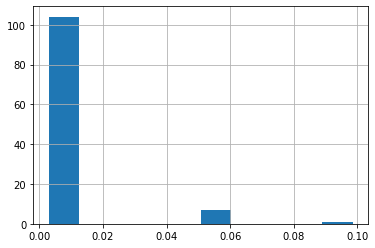

In [112]:
pd.Series(sel_.estimator_.feature_importances_.ravel()).hist()

In [113]:
print('total features: {}'.format((X_train.shape[1])))
print('selected features: {}'.format(len(selected_feat)))
print('features with coefficients greater than the mean coefficient: {}'.format(
    np.sum(sel_.estimator_.feature_importances_ > sel_.estimator_.feature_importances_.mean())))

total features: 112
selected features: 10
features with coefficients greater than the mean coefficient: 10


So here we can increase the number of trees in the random forest classifier to get better results. Among all the methods this will be one of the best methods to use to get the feature importance.

## Conclusion

This notebook will not be possible if not because of - [Soledad Galli](https://www.udemy.com/course/feature-selection-for-machine-learning/)'s amazing Udemy course. All the credits goes to her for developing such an amazing course.

Thanks for reading the whole notebook. Will add more techqnies on **Hybrid Methods** and **Advanced methods** **(Work in Progress)**. 

<div align='center'><font size="5" color="#FC6306">If you like this kernel please UPVOTE and Fork it</font></div>